<a href="https://colab.research.google.com/github/Dmitri9149/Transformer_From_Scratch/blob/main/Transformer_Values_Keys_Queries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



## Transformer in "Quantum Mechanical" notations.
## What are the V, K, Q in the Transformer? 
## What are the Value, Key, Query ?  
\


###Bra and Ket vectors. Einstain convention. 
\

If we have a vector V : the 'ket' vector is ... just  V  vector,  
but written in the form : 
$$|V> $$
The 'bra' vector will be: $$<V|$$

'Bra' correspond to a linear operator:  
if we have vector $|U>$ the operator will be:  
$$<U|$$ 
The operator takes a vector:
$$|V>$$ as input and produce scalar number: $$<U|V>$$ as output: where the scalar is the dot product between U and V.  
We can also construct the operator: 
$$|U><V|$$ 
it acts on the vector $|G>$ in the way : 
$$(|U><V|)|G> = (<V|G>)|U>$$
We may also think about: $$|V>$$ as column vector: 
$$\begin{bmatrix}v_1\\v_2\\..\\v_n\end{bmatrix}\quad i=1,..,n$$
And about: $$<V|$$ as row vector:
$$\begin{bmatrix}v_1&v_2&..&v_n\end{bmatrix}\quad i=1,..,n$$

If we have ooperator (matrix) G of size m\*n: where 
$$ j = 1,..m\quad i = 1,..n $$ acting on:  
$$|V>=\begin{bmatrix}v_1\\v_2\\..\\v_n\end{bmatrix}\quad i=1,..,n$$ as 
$$ $$
$$G|V>$$
the corresponding operator acting on: $$<V|=\begin{bmatrix}v_1&v_2&..&v_n\end{bmatrix}\quad i=1,..,N$$ will be $$G^T$$
$$ $$
$$<V|G^T|$$  
where $G^T$ has size n\*m and $G^T$ is matrix transpose to G.  

$$ $$
Let as choose orthonormal basis: 
$|e_i>$ where i = 1,..n  
In the basis : $$<e_i|e_j> = 1$$ when $i = j$  
and  
$$<e_i|e_j> = 0$$  
when $i = j$ .  

In the basis we have for a vector q : 
$$q = q^i|e_i>=\sum_{i=1}^nq^i|e_i>\quad   i=1,..,n$$    

And for a covector (linear operator) k : 
$$k=k_i<e^i|\quad   i = 1,..,n $$  

We use the Einstain convention here:  
when an index appears twice in a single term in upper and lower position, we sum all the corresponding terms over the index. The notations will be used to get a shorter form for some expressions. 

 
































### Learning Procedure
The typical task is. 
We  have liner operator: 
$$G(a)$$
where a is a set of parameters and $$a\in R^N$$  
We also have a pair (t,s):  
where t is what we have to get when we apply G to s.
We can take as measure of similarity of what we get and what we want $$<t|G(a)|s>$$
If we will get what we want: the expression will be 1. If we will be very far from what we want, it will be close to 0. 
We may consider the expression above as a potential V(a).  To get what we want we will try to find  $a^*$ which will maximize the V(a).  
In general case we have a set of experiments:  
$$(t_1,s_1), (t_2,s_2),......,(t_n,s_n)$$ where t and s reflects some relation between the two values. The t and s may be expressed in such complex form, that it is not possible easily construct the operator G which transform target t to expected result s. Moreover, t and s may have mistakes.  
To construct such G we may:  
1.Make some guess what is the general form of the G and how the general form vary depending on some parameters a. For example we may guess the t and s are related by linear operator G(a) and our task is to get the 'best' a.  
If we will designate the best a as $a^*$ , we will get the needed operator $G(a_*)$.
We can do it in the way:  
1.Consider the sum of all the results of 'measurements':  
$$\sum_i<t_i|G(a)|s_i>$$ as potential V(a).  

2.Find the parameter which minimise the potential: $a^*$.  
The $G(a^*)$ will reflect the relations between the t ans s in the 'best' way. 

We will try to express the learning taks using the vectors, covectors, linear opetators and scalar products in this way.   


### Split Identity  

We can always write a vector q (we assume othonormal basis) in the form: 
$$q =\sum_{i=1}^nq^i|e_i>=\sum_{i=1}^n<e^i|q>|e_i>,$$
because:
$$q^i=<e^i|q>|\quad   i = 1,..,n $$  
Or, what is the same: 
$$q =q^i|e_i>=(\sum_{i=1}^n|e^i><e_i|)|q> =\sum_{i=1}^n|e^i><e_i||q>$$


#### Some intuition. 
Let us try to develop some intuition. We have 'particle' q , but it also have some kind of wave nature:  
we construct the  'grid' of the operators:  
$$P_i=|e^i><e_i|\quad i = 1,..,N$$  
and particle q is passing via all possible paths throught the grid's clefts. At every cleft i = 1,..,n we 'map' our particle q by operator  
$$P_i= |e^i><e_i|$$  
and finally 'reduce' by summing all the results together again into the same q.  
See the pictures below.

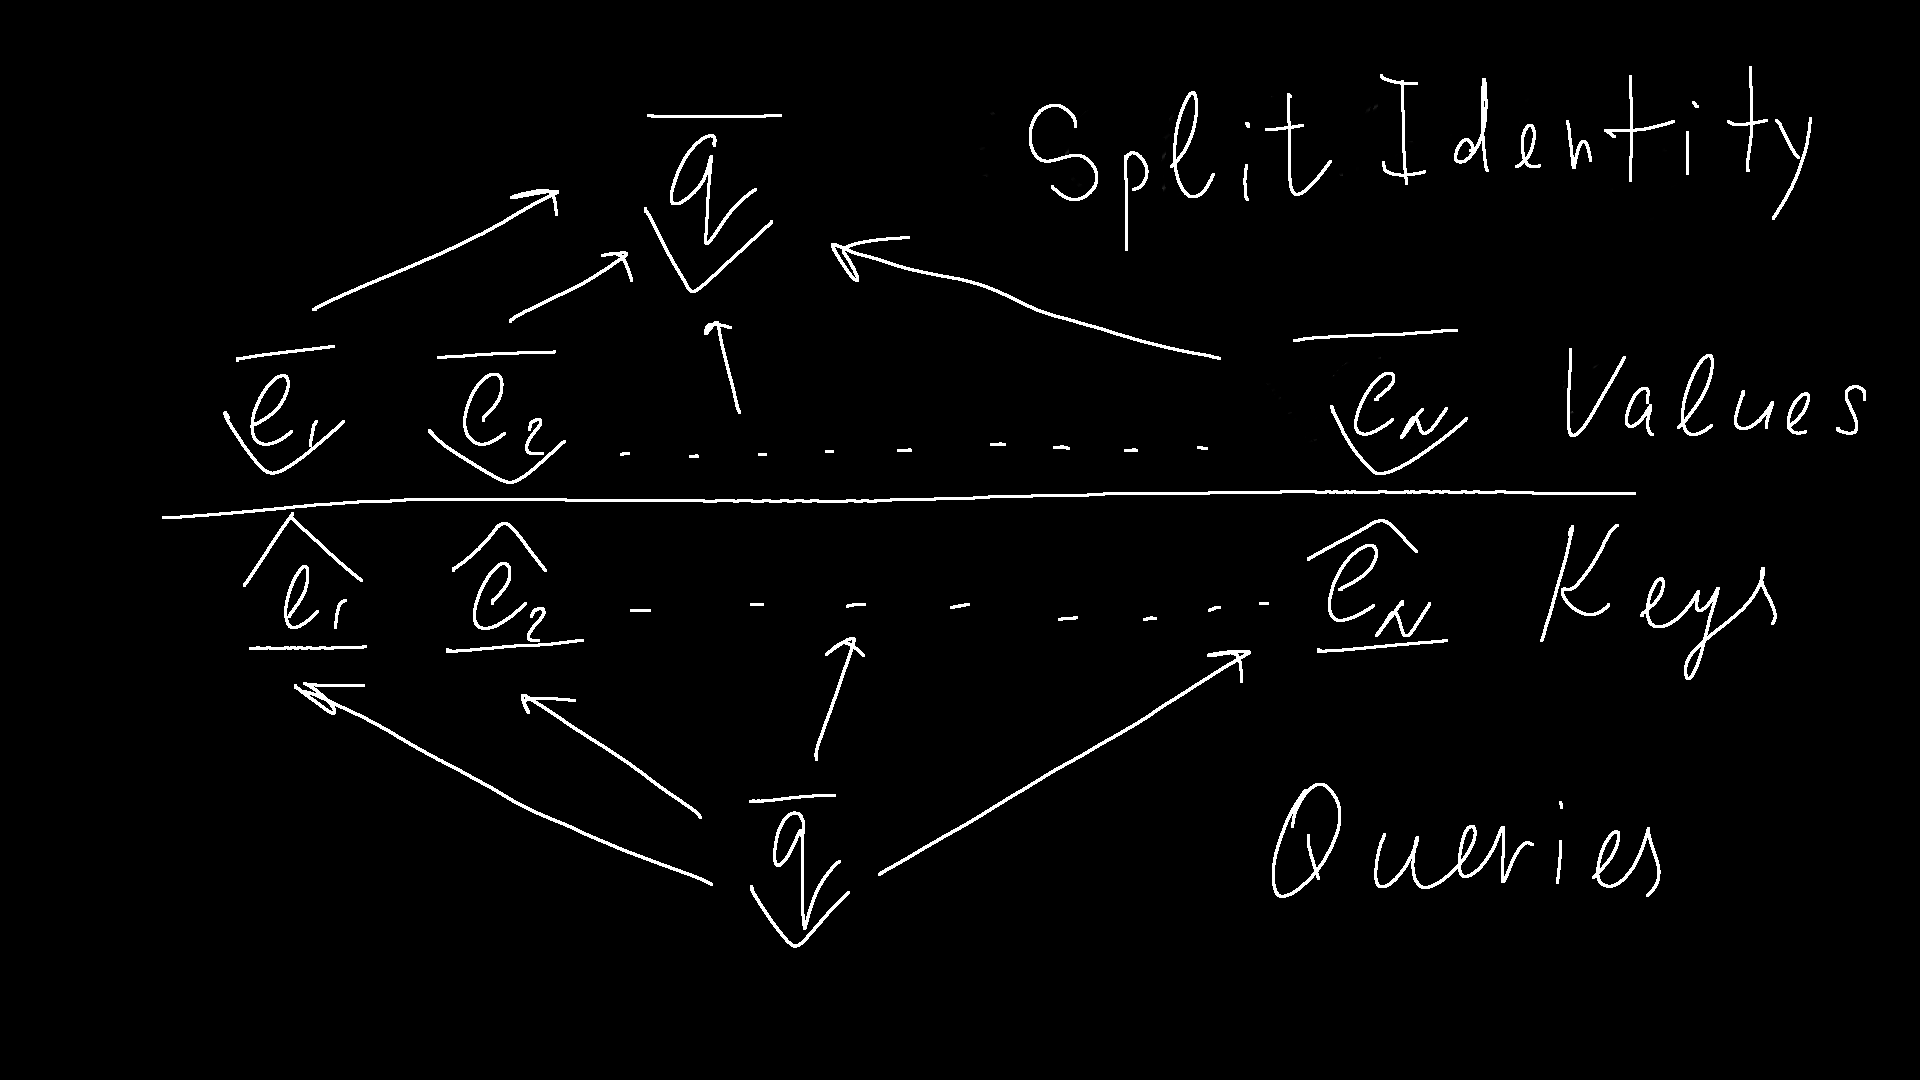

In [ ]:
from IPython.display import Image
Image("/content/drive/My Drive/Data/my_projects_data/Split_Identity_v3.png",width = 800)

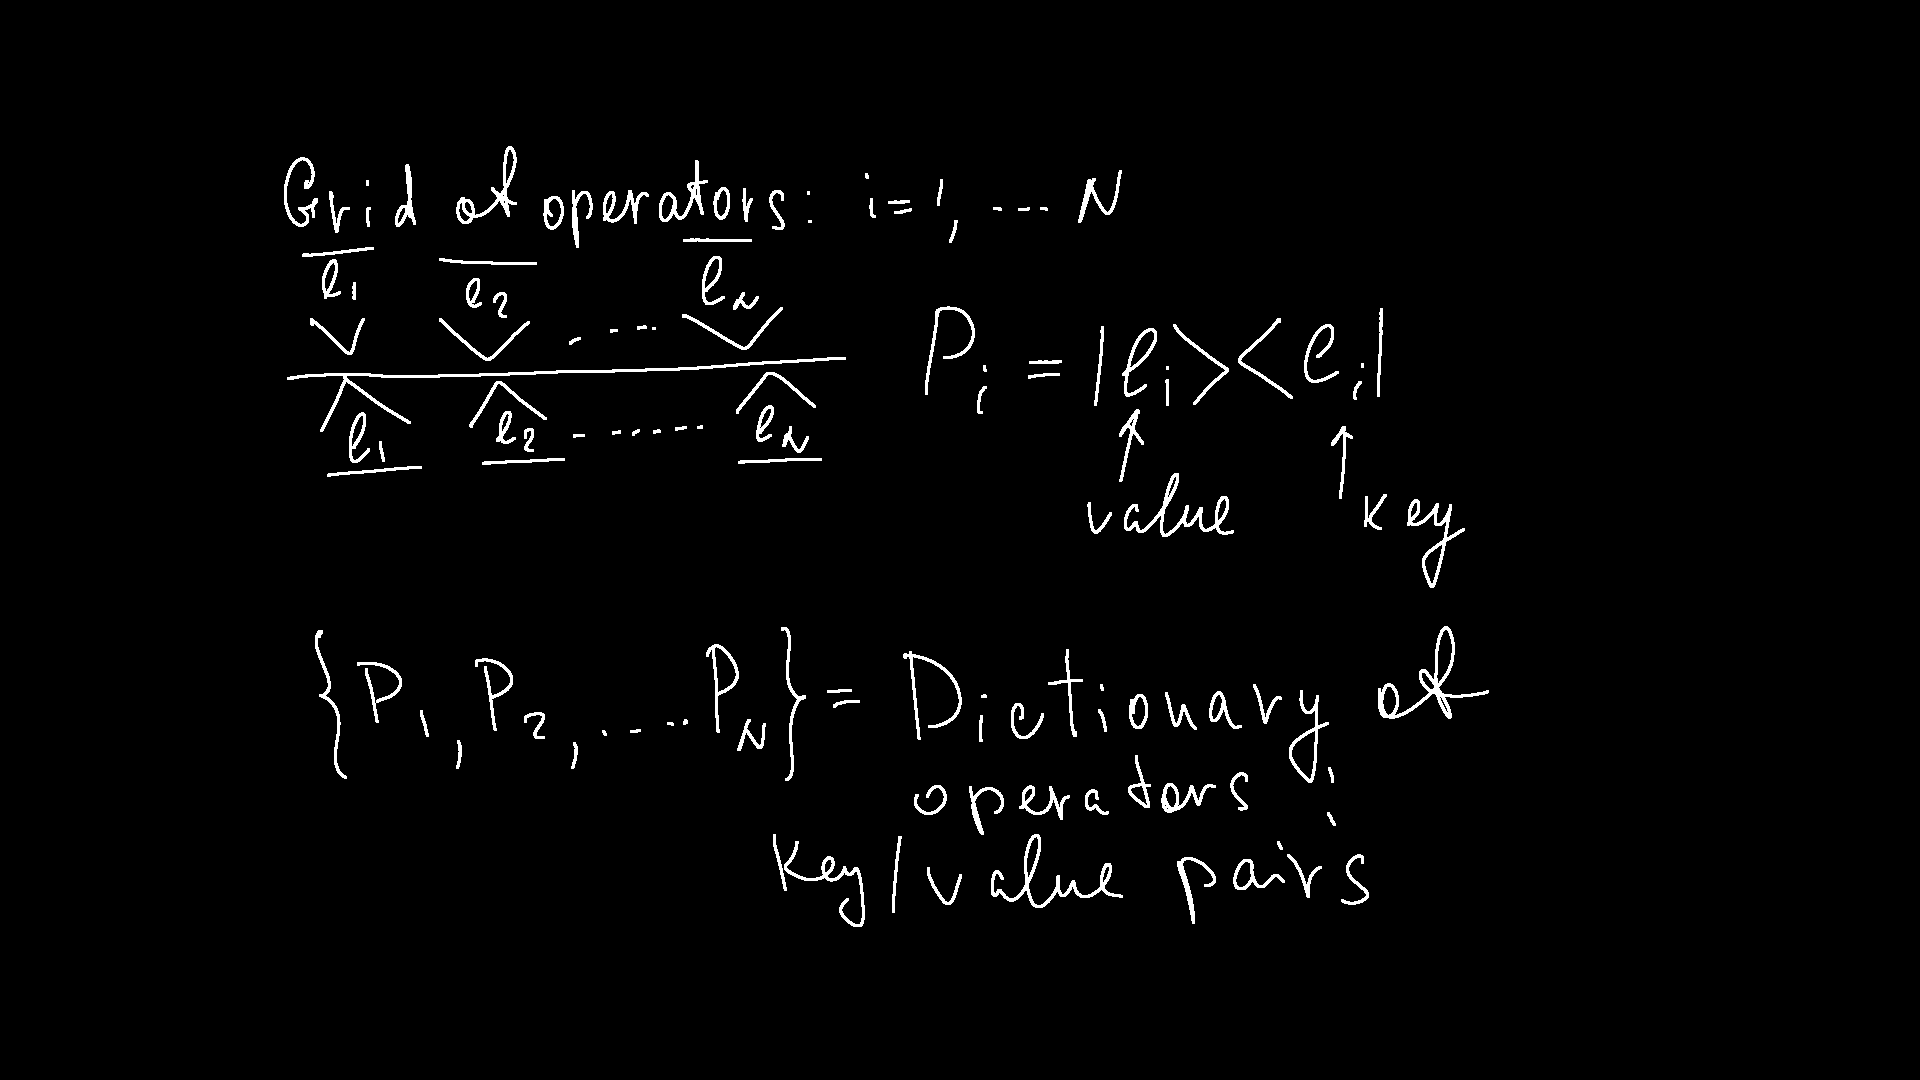

In [ ]:
from IPython.display import Image
Image("/content/drive/My Drive/Data/my_projects_data/Grid_operators_v0.png")

### Projection Operators
The operators $$P_i\quad i=1,..,n$$ are very important: these are Projection Operators. Every such operator $P_j$ project 'particle' q to the corresponding basis vector j. And the Split Identity experiment correspond to the 'grid' of the $$P_i, i =1,..n$$ and our particle q, passimg throught the 'grid'.  
We may introduce Identity operator E:  
$$E|q>=|q>$$
Taking into account what we know about $P_i$ we can write:  
$$E = \sum_{i=1}^NP_i \quad   i=1,..,N$$ 
See the picture.   


### Attention Mechanism (change statistics)   
Let us try another 'grid' : 
$$\sum_{i=1}^na_iP_i=\sum_{i=1}^na_i|e^i><e_i| \quad   i=1,..,n$$ We may assume the $a_i$ are appropriatelly normalized, for exmple:  
$$\sum_{i=1}^na_i= n \quad   i=1,..,n$$ 
In this case we will not get same q if we pass it throught the grid.
We will get something new. Let us think about $a_i$ as 'an importance' of our basis vectors  
$$|e_i>\quad  i=1,..n$$  
in the new 'grid'.  
If we will take a vector:
$$q = (\sum_{i=1}^nP_i)q=\sum_{i=1}^n|e^i><e_i|q \quad   i=1,..,n$$
and apply the 'scores' 
$$ a_i= 1 \quad   i=1,..,n$$
to the above equations we will get a new vector q(a): 
$$q(a) = (\sum_{i=1}^na_iP_i)q=\sum_{i=1}^na_i|e^i><e_i|q \quad   i=1,..,n$$  
The $q(a)$ is received from q by changing the 'importance' of initial components 
$$q^i \quad  i=1,..n $$  
of q, from 1 to $a_i, \quad i=1,..n$  
If in q we pay equal 'attention' to all components $q^i$ , in $q(a)$ (which we receive transforming q) we pay 'attention' to components $q^i$  in accordance with $a_i$ scores.  
We change attention for components in q vector from:  
$$(1,1,....,1)\quad  to\quad  (a_1,a_2,..,a_n)\quad i= 1,..,n$$  

### Statistical point of view. 
Vector below are still considered as orthonormal.  
If we have a statistical variable e and we observe vectors $$|e_i> \quad i=1,..n $$  
or, what is the same:
 $$|e^i><e_i| \quad i=1,..n $$    
with some probabilities $p_i $ where :  
$$\sum_{i=1}^np_i= 1 \quad   i=1,..,n$$  
In this case the operator:  
$$\sum_{i=1}^n(1/n)P_i\quad   i=1,..,n$$  
represents ensemle where all vectors are equally probable.  
The operator:  
$$\sum_{i=1}^n{a_j}^kP_i\quad   k,j,i=1,..,n$$
$${a_j}^k = 1\quad j=k$$ 
$${a_j}^k = o\quad j\not=k$$
represent ensemble where we observe only one vector from N possible, and newer observe other vectors.   
And in general case:
$$\sum_{i=1}^n{p_i}P_i\quad   k,j,i=1,..,n$$  
vectors $e_i$ are observed with probabilities $p_i$ 










### Generate sequence of vectors

Let us take orthonormal vectors: $$|e_i>\quad i= 1,..,n$$
and operator: 
$$sequence=\sum_{i=1}^{n-1}|e^{i+1}><e_i| \quad   i=1,..,n-1$$
We may see:  
$$sequence|e_1>=|e_2>$$
$$sequence|e_2>=|e_3>$$
$$...$$
$$sequence|e_{n-1}>=|e_n>$$

And the operator:  
$$cyclic\_sequence=\sum_{i=1}^{n-1}|e^{i+1}><e_i|+|e^1><e_n| \quad   i=1,..,n$$
will generate cyclic sequence, because we 'glued' |e_n> back to |e_1>:
$$  $$
$$cyclic_sequence|e_1>=|e_2>$$
$$cyclic_sequence|e_2>=|e_3>$$
$$...$$
$$cyclic_sequence|e_{n-1}>=|e_n>$$
$$cyclic_sequence|e_n>=|e_1>$$
We may take $|e_1>$, pass it throught the 'grid': it means we apply the operator sequence , or cyclic_sequence to the $|e_1>$,  
 and we will get $|e_2>$;   
 we will take the result: $|e_2>$ and pass it throught the 'grid' again:  
 and we will get $|e_3>$  ...etc.... 






### Birth and death operators

The bases continue to be orthonormal.  
The operator $|e^j><e_i|$ works in very interesting way. Let us supply $|e_i>$ to it. It will be 'eated' by the right part of operator (death of $|e_i>$) and $|e^j>$ will be produced by the left hand side of the operator (birth of partice$|e_j>$).  
We may link with $<e^j|$ death operator :  
$$A_j$$  
and with $|e_i>$ birth operator: 
$$A_i^+$$
In this case the 'cyclic_sequence' we can write as : 
$$cyclic\_sequence=\sum_{i=1}^{n-1}A_{i+1}^+A_i+A_1^+A_n \quad   i=1,..,n$$

From here we may easily see what happens: the 'eating' of a $e_i$ is immediatelly followed by 'production' of $e^{i+1}$  
Plus there is the 'edge' condition: 
$$A^+_1A_n$$  
which transforms $|e_n>$ back to $|e_1>$  
and we have the cyclic behaviour.




### More formal definition. 
We assume we are in ONB ! (In orthonormal basis !!).  

Let us try to be more formal.  

We have a vector space with basis vectors:
$$|e_i>\quad   i=1,..,N$$
Let us add to the systen "vaquum" state: $$|0>$$
It will be a new vector.  

We may introduce the $$A^+_i\quad and \quad A_j\quad  $$  
like this: 
$$A^+_i|j>=0$$
$$A^+_i|0>=|i>$$  
for any i,j.  
And
$$A_i|j> = 0 \quad if \quad i\not=j; \quad and \quad |0>\quad if \quad i=j$$


### Natural language case

In case of a language, we have Vocalubary of size VocabSize.  
Let us link with every word his own vector space. Every word $$w_j$$ will be 'vacuum' in the space:  
$$|0_j>$$. It is just an item without any idea how it is linked with other 'vacuum' items. Real words, which we use, are not just an items, the words keep natural informative relations between each other. The embeddings are exactly about of this: how one word is related to another word. Real words are produced by 'birh' operators. We can make a statistical investigation and determine, how often other words appears in sentencies with word 'I', for example. For this (particular) case for 'I' we will have vector embedding, which we identify with the 'birth' operator : $$A^+(embed)_{I}=\alpha_{I}A^+_{I}+\alpha_{am}A^+_{am}+\alpha_{love}A^+_{love}+...  $$ 
And we may demand the sum of squares of all the $\alpha$'s is equal 1.  

Because of difficulties to write indexes I place 'embed' in roud braces, it means the operator is parametrized by 'system' where it is used.   
What about corpus of sentencies ? Every entence bring us a lot of information: the chance the words are collected and are independent is about 0. In case of particular corpus of sentencies 'embed', in case of particular sentence, it is reasonable to think (at least initially) about a word in sentence as the birth operator above.  
What is important: the birth operators to the left for 'I' depends on embedding, the birth operator to the right is not, it just reflect 'birh' of 'I' particle. But the real word , which we may understand as 'meaning' of 'I' in our particular embedding case, is a superposition of all 'items' in our vocabulary with some coefficients. Of course, we may expect the $\alpha_{I}$ is close to 1, which reflect the special role the 'item I' is playing in our 'I' embedding (meaning).  
As we know, everythng make sence only in context. And this is a practical procedure, how we take into account a context. Context is represented by corpus of sentencies, where our particular sentence is living. And we extract the context as superposition of our 'word items'. It is some kind of 'secondary quantizations'. First quantization is splitting of our strings in corpus. We split our strings on white spaces and collect the Vocabulary of items, just symbols, nothing more. There are many ways to make an embedding, but every embedding is about this: our words are not longer just an items, but reflects a meaning they are getting because of the embedding, and the particular meaning is reflected by the particular superposition, by which we now replace a 'pure' item. And the good way to think about it: by the 'birth' operators (see below).  

Let us take sentence p. There are 'words items' $${|0^{v(i)}>}_j \ j=1,..,J; \ v(i) \in Vocab$$ where J is length of our sentencies. 
The interplay of the indexes is very important. 
The j correspond to the position, coordinate in our space, position of a word in a sentence. But v(i) correspond to some event at the position, it is reflection of the changes which happens with our list of words while we go throught the list (usually from left to the right). The 'you' works like 'infinitesimal impuls' in mechanic which change our system in 'impuls direction'. Here is something similar: the list 'I love ...' is changed by 'you' in the derection the 'you' keeps. On the other side: the 'you' is a coordinate, which indicate the third position in our list 'I love you' after 'I' and 'love'. 'you' mark a position  and what happens in the position in our sentece.
'you' has the properties of state and of impuls, an operator which act on a state.    



### States and operators, how it works concretelly

Let us take Embedding 'E' and a phrase 'P'. Word $|w>$ in P is represented (at least initially, the representation may change) as birth operator:  
$$A^+_w(E)$$  
There is also death operator : $$A_w(E)$$  for every 'w'  
and we can construct for every $$w \in P$$  
the operator: 
 $$A^+_w(E)A_w(E)$$   
 Finally, we construct the operator, which uniquelly represent out phrase P: 
$$\sum_wA^+_w(E)A_w(E) \ where \ w \in P$$ 
Actually, the operator represent 'bag of words' model for a sentence, there is no explicit positional flawor in the operator, I am aware about it, but it is a difficult question and will be discussed later. The possible solution is to consider a word as a product of w*j= (w,j), as a tensor particle where second particle represent position in a sentence and has 'fermionic' flawour: there is not allowed to be a (v,j) and (w,j) with same j in a sentence P. It seems, there is another solution, which is used in the Wasvani Transformer. Let us add to our 'vacuum' state a new vacuum items $|0_1>, |0_2>, etc....$ which represent natural numbers. We may change the birth operators in such way, that in every superposition some $|i>$ is included with a fixed coeficient 'a', same for all superpositions. It will place rigid constrain on the birth operators which correspond to words in a phrase. There is an $|i>$ for every 'word' in phrase, there are to be words with all i from 1 to J, and no two words with same j.  
I am not sure, is it enought, but we will consider P not as a set, but as the ordered set of events (1,2,3,....J) or even , in some cases , $(1,2,3,...,\infty)$
The sonstruction is something like this. We will think about words w from P as W function W(j), j=1,..,J (or inf). It means we combine J similar copies of our Vocab spaces (including vacuum states) in one big new vector space. Vacuum states are now marked by a word and by a number j, same for our birth and death operators. In this case: for a phrase P=(0,1,2,....), we have: $$W_P(x) \ x \in P$$  
And out operators will be :   
Birth (for phrase P in embedding E):
$$A^+(E,P)(x)=\sum_p\alpha(p,x)A^+_{p,x}$$   



### High order form for our operators
Our operators will be :   
Birth (for phrase P in embedding E):
$$A^+(E,P)(x)=\sum_p\alpha^+(p,x)A^+_{p,x}$$  
Death: 
$$A(E,P)(x)=\sum_k\alpha(k,x)A_{k,x}$$  
where $$x,y=(1,..,J); \ k,p=(1,..,VocabSize)$$  
The phrase operator: 
$$Grid(E,P)(x) = A^+(E,P)(x)A(E,P)(x)= \\ 
(\sum_p\alpha^+(p,x)A^+_{p,x})(\sum_k\alpha(k,x)A_{k,x})= \\ 
(\sum_{p,k}\alpha^+(p,x)\alpha(k,x)A^+_{p,x}A_{k,x})$$  
where   
$$x=(0,1,2,..,J)$$
$$\alpha^+(k,x)=\alpha(k,x)$$  
in our case.

There is nothig mistic in the opertor, see the drawings. I hope from the drawings it will be clear what it is and how it is calculated.





### Key, Value, Quiry

The operator $$Grid(E,P)(x)$$ is actually from what the Attention Mechanism is calculated for learning. 
We may think about the operator as 'Dictionary[x]' where 'x' is the index in our dictionary. The operator  
$$A^+(E,P)(x)=value[x]=|W(E)(x)>$$ 
and  
$$ A(E,P)(x)=key[x]=<W(E)(x)|$$ where 
x = (1,2,3..J).  
If we combine all in one 'death / birth operator', the K/V Dictionary will be particularly explicit: 
$$Dictionary(E,P)(x) = A^+(E,P)(x)A(E,P)(x)=$$
$$$$
$$=(value[x],key[x])=|W(E)(x)><W(E)(x)|=$$  
$$=Grid(E,P)(x)$$  
where x = (1,2,3,..,J)
$$|W(E)(x)>$$ is word embedding at position x in our phrase P corresponding to our Embedding of words from corpus E. It is superposition of all words from our Vacabulary which we consider just as 'items'. Actually, any Embedding has two stages:  
1.Meaning, context stage: under what considerations and assumptions , and what tasks we have in mind when we replace item w , by superposition of all items in Vocabuary. How we compute the (a1,a2,..,...) coefficients in our superposition. What is the 'birth' operator ? 
2.How we decrease the size of our huge Vocabulary space. We embed word representations in the original big space , by some procedure, to a smaller D space. Even 'pure' words |w> and |v> which are perpendiculat in our original space will transform to vectors which will not be perpendicular. 
But even in the smaller space we can make operators  
$$=(value[x],key[x])=|W(E)(x)><W(E)(x)|=$$  
$$=Grid(E,P)(x)$$  
where x = (1,2,3,..,J) where $$|W(E)(x)>$$ is now an embedding to the smaller space. But the meaning of the operators and how to make normalizatio is less clear in the case.  
The vector normalization questions looks as solvable, but I still do not know exactly how to do it all together. This is initial considerations mainly to express some intuition and trygive some explanations what, from my point of view, is happening in Transformer case.

I mixed notations: Grid(E,P)(x) is my notation, Key/Values are from the Wasvani paper and the rest are from Quantum Field Theory. 

### Query Q and 'Third quantization'

In the Transformer scheme, the quiry is the paticle transformation we pass throught the Grid(E,P) operator: we take a q, apply Grid(E,P)(x) to q for every x, and sum all the results in the new q_new. The pqrticles q are named as Queries. 
Well, it works like a new bith operator... We may take the first word w_1 of our target sentence, apply the operator and we will get w_1_new. In the transformer we do it with every word in our target sentence, and if we will trace how the transformer words, we will se we actually try to translate the targte phrase in w_new representations, not in the original words. 
The w_new is superposition of actions of all the other words in target sentence. Initially, we have words just as unlinked items. When we study the general statiscic of our big phrase corpus, we get 'second' quantization:any word is represented form the point of view of ALL other words. ALL is crucial here, because when we start tightly work with source/target pairs, we may expect the word menaning may change. Actually, we do it. Now we try to make a word representation from the point of view of ALL WORDS IN SENTECE. We take word w from source sentence, which is result of 'second' quantization, apply Grid(E,P) to it, and receive the result of 'third' quantization. The new 'meaning' of a word have to correspont better to our task of source to target translation.    
We do same for the target sentence too. And then we manipulate by the new representations to get our goal of translation.   
I did not check it , but it seems there is some analogy with Monads. Let us say we have initial item 'dog'. By staistical embedding we include ('wrap') the word dog in Monad(E,w) = Snd(E)(w) and get Snd(E)(w). We decribed it as some kind of 'birth' operator. When we manipulate by source/target, we include the dog_second = Snd(E)(dog) to dog_third=Third(E,P)(Snd(E)(dog)). And we realize it as a 'birth' operator too, which act now on 'second quantization' representations of the 'dog'. Physically, the 'third' quantization is also just a superposition of all words in vocabulary, but now the words from the source and target phrase are represented with much higher coefficients in general.  
We also have to go out of monad. Back to our just items. We do it within learning procedure, by comparing the 'candidate' result of prediction which is a words superposition, with just item = the correct answer (word). 
### What happens within learning. 




### Toy model of language translation.
Let us consider two languages. We are looking for translation of one language to another. Let us make 'one hot encoding of words' in both languages. To every word we will assign a unique natural number. And all the word vectors are orthogonal. Word_j is vector will 1 in the position j and 0 in all other places in infinite dimentional vector. 
We may think we will have "infinite dimentional " vocabularies:
$$V_t \quad and \quad V_s \quad target \quad and \quad sourse $$
Very big sized (and we do not know how big) vocabularies.  
There is one problem: we use same numbers for numbering in both vocabularies. If we make numbering independently, same number may be assignet to word in target and source languages.  We may easily eliminate the problem by splitting the natural numbers in two parts: 
let us use odd numbers for target language numbering, and even for the source language.  
In this case there is no "clash" of numbers and we managed to embed both languages in one set of numbers.
The toy model will mean, the translation will be very simple, because the two languages are very "strongly" linked.  
Let us assume to every target word there is corresponding source word, and vise versa.  
So, for a sentence of n source words, there will correspond sentence of n words in target language of the same words , but "translated" to target language.  


### Higher order construct
Let us try to collect all we have in some gigh order constructs. 
We have $$p = 1,2,..,Corpus\_Size$$ pairs of source / target sentencies.  
We may write it in the form:  
$$W^0_p(x); \ W^1_p(x): \ x = 1,..,N=Sentence\_Length$$  
where $$W^0_p(k)=word_k=|k>$$
$$ or \ W^0_p(k)=|0> $$  
if there are no words at k:we have \<pad> tokens at k, our sentence is shorther than k. Using |0> we may determine our W functions on all x up to infinity, but usually we will constrain out sentencies by length N.   
$$W^1_p(r)=word_{2r}=|2r>$$
the k-th word in source sentence and r-th word in target sentence. 
Let us consider the operator, we will name it 'Hamiltonian', for a sentence source p: 
$$H^{init}_{p}=\sum_x\alpha(x)|W^0_p(x)><W^0_p(x)|; \ x=1,..,\infty$$  
$$\alpha(x)=0; \ if \ W^0_p(k)=|0> \\ $$
$$\alpha(x)=1/(Words_p); \ if \ W^0_p(k) \not=|0>$$
Where Words_p is number of words in source sentence p.  
In operator form it will be: 
$$H^{init}_{p}=\sum_x\alpha(x)A^{*0}_p(x)A^{0}_p(x); \ x=1,..,\infty$$ 

Let $$\{W^0_p\}$$ is the set of all words in sentence p, in this case we can easily use $$H^{init}_p$$ to learn linear transformations corresponding superposition of words from 
$$\{W^0_p\}$$ 
Transformations like: 
$$L_{p}=\beta(x)|W^0_p>; \ x=1,..,\infty$$ 
where 
$$\beta(x)=0; \ if \ W^0_p(k)=|0>\\$$
$$\sum_w\beta(x)=1; w\in\{W^0_p\}$$




### Word renaming. 
The operator above in limited: There are no terms like: 
$$alpha(x,y)|W^1_p(x)><W^0_p(y)|; \ x,y=1,..,\infty$$
We have to add the terms. 



### Some interrupt in the job.
At the moment I have no many time to continue the job. It will be done later. Now I shortly try to describe what happens in the Transformer (s) case. 

### What we will get after learning. 

Again the one hot encoding is considered. 

There will be several operators to the end of learning. 
********************The first one is very important and originate from the 
$$H^{init}_{p}=\sum_x\alpha(x)|W^0_p(x)><W^0_p(x)|; \ x=1,..,\infty$$ above. 
We may write it like:  
$$$$
$$\Psi^{init}(W^0)=\sum_{x}\alpha(x)|W^1(1)><W^0_p(x)|; \ x=1,..,N$$




### General 'grid' of operators
In general case we may write the 'grid' as the tensor:
we have input vectors of  
 size j=1,..,m  
 (correspond to the dimention of embedding in case of word vectors).  

When we have a sentence with n word, i=1,..,n  
we think about the n words vectors as 'basis' vectors which will form our 'grid' and which we will also try to transform by the 'grid' in the result we may need.  

The word vectors may be described as numbers $$w^{ij}\quad (i,j)=(1,1),..,(N,M)$$ 
$$w^j\quad j=1,..,M$$  and our operator as :  

$$G_{hl}^{rp}\quad (h,l)=(1,1),..,(N,M) \quad  (r,p)=(1,1),..,(N,M)$$  
We assume the dimention of embedding of words in target sentence is also M, and source and target seentencies have same number of words: N.  
If not, we make padding (which also bring some complications which we are to solve by such mechanisms as 'valid_length' or 'Masked_Softmax').  
Using the Einstain convention,   
the result of application of our operator is: 
$$t^{rp}= G_{hl}^{rp}w^{hl}\quad (h,l)=(1,1),..,(N,M) \quad  (r,p)=(1,1),..,(N,M)$$  
$$ $$
We have to add learning matrixes to the operators:  
$$S^i_j\quad (i,j)=(1,1),..,(M,M)$$
and
$$T^i_j\quad (i,j)=(1,1),..,(M,M)$$
$$ $$
And operator, our 'grid' which we apply will looks like this:  
$$t^{rp}= T^p_dG_{hl}^{rd}S^l_vw^{hv}\quad (v,h,l)=(1,1,1),..,(M,N,M) \quad  (d,r,p)=(1,1),..,(M,N,M)$$




### Try to learn what we need



If we have q as input and v as output (where v is a vector from the same space as q), we may use a learning mechanisms and backpropagation to calculate the needed $\{a_i\quad   i=1,..,n\}.$.  
As the result we will get the 'grid' of operators: $$a_i|e^i><e_i| \quad   i=1,..,n$$ which will transform out initial q to the final v. Actually, the calculation of such 'grids' , or 'states' is the essence of the Transformers: our target is to find the 'grid' which will transform the input to the output we need. The 'grid' is the grid of operators: 
for every i:  $$a_i|e^i><e_i|$$ is a martix of size $n^2$ which transform vectors of size n.

### Renaming to get correspondence with NLP and Transformers. 
### Dictionary, query, key/values. 

Let us rename our vectors and covectors:
$$<e^i| = <k^i|\quad  i=1,..,n$$ and 
$$|e_i>=|v_i>\quad   i=1,..,n $$
And in the new notations we have: 
$$q =q^i|e_i>=(\sum_{i=1}^n|v^i><k_i|)|q> =\sum_{i=1}^n(|v^i><k_i|)|q>$$

The Q (or a q) is from: "Query".  
The K (or a k) is from: "Key".  
The V (or a v) is from:  "Value". 

See the picture.... Most probably, the developers of Transformer used the 'dictionary' intuition. I use the word 'grid', which is in some correspondence  with Quantum Mechanics and operators algebra, where we pass an electron throught a grid and collect and analize what happens on the other side of the grid with our particle. We also may think about our grid of operators as a 'dictionary': it is a dictionary (in the sence of modern programming languages) of keys/values pairs : 
$$|v^i><k_i|\quad   i=1,..,n$$  
We may take a 'query' q, calculate the 'vector' of scores: 
$$s_i = <k_i|q>\quad  i=1,..,n$$ where we can thing about s as a vector: 
$$|s>= (s_1, s_2,..,s_n)$$  
and make 'dot_product' of 'vector of vectors' v:
$$|v_i>\quad  i=1,..,n$$
or 
$$v=(|v_1> , |v_2>,..,|v_n>)$$  with s and get: 
$$q_{ trans}\quad = s_i|v^i>=\sum_{i=1}^n|v^i>(<k_i|q>) =$$
$$=\sum_{i=1}(|v^i><k_i|)|q>= (\sum_{i=1}|v^i><k_i|)|q>$$
\
We may have many queries: let us say we have collection Q of $$q^1,q^2,..,q^m\quad   \{q^i,\quad   i=1,..,m\}$$
queries.
After passing through the 'grid' of operators, we will get collection $Q_{trans}\quad $ of:
$$q^1_{trans}\quad,q^2_{trans}\quad,..,q^m_{trans}\quad   \{q^i_{trans},\quad   i=1,..,m\}$$ 
queries. 


### Birth , death operators again. Learning again. Orthonormal basis again. 

If we have orhonormal basis $$|e_i>$$ everything become very symple, usually. But usually we do not have an orthonormal basis.  
If we believe in our system, and believe there is to be an orthonormal basis, we can 'wrap' , like a Monad wrap , our input in matrix which will transform our input vector to orthonormal vector, and make the matrix part of our learning process.  
 It means the  parameters of our matrix $o^i_j$ will be parameters which we have to learn. And we have to designate as O as the matrix of all the parameters. We will learn the O matrix.  
In simplest case, we will have (b,a) pairs, where b is vector in orthonormal basis, and a is our sourse , original vectors. We have to learn (find) map G(O) which is parametrized by matrixes O, and we will find some $$O^*$$  
which will maximize the V(O) which correspond to sums of all:
$<b|G(O)|a>$  in our learning experiment.  
Or, it will minimize the (-V(O)).  
In case of transformer, we have to two subsystems: for sourse sentence and for target.  
Actually, transformer works in the way, the part of learning are the $O^s$ and $O^t$  
Our transformation is $$G(O^s,O^t)$$
The matrixes appears in Attention Mechanism,  when we do the Linear Transformations. May be it appears in some other places too, like in PositionWise encoding, because the Transformer is structured in some othr way we discuss here, but there a lot of similarities.   
Even if we transform s ant to to orthonormal bases, the bases will be different.  
Even two languages correspond one to one , word by a word to each other, the name of words are different. In both languages, we may use natural numbers for words numbering of words, but we have to find the 'renumbering' to go from language to language. It means, in case of vectors we have to have orthogonal matrixes L(s,t) and L(t,s) which are reverse to each other and which have to act after the orthonormalilzation stage.   
Our parametrization will change:  
now we have the  $$G((L(t,s),L(s,t)),O^s,O^t)$$.  
The 'birth' and 'death' operators are very intuitive in orthonormal basis. If we are at stage or state $|i>$ and would like to go to $|j>$ , the process is describe by operator $$|j><i|$$ or by $$A^*_jA_i$$  
We may construct the operator:  
$$G =\sum_{i,j}a(j,i)A^*_jA_i$$ and learn it by showing the (j,i) transition pairs. If our system is set of cyclic transitions, like in example above, and we allow for a(i,j) to be between 0 and 1, our system wil easily learn from  the sample pairs (j,i) to maximize the sum of all:   $$V(A)=\sum_{j,i}<j|G(A)|i>, (j,i) \in (SetOfSamples)$$ 
Where we disignate by A matrix with elements between 0 and 1. But in this case we have to normilize the A and our vectors j and i. Most probably by $L_2(A)=1$. same for norm of j's and i's.  
Statistic of samples, will be laso reflected in the coefficients of A matrix: the more often the (j,i) pair will appear in samples, the bigger the a(j,i) will be in the matrix.  
We may also 





